In [194]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('houses.csv')
df.head()

,price,bd&ba,sqft,address
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831"
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834"
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834"
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815"
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828"


## Let's clean our data

In [195]:
# check na value
df.isna().sum()

price       0
bd&ba      58
sqft        0
address     0
dtype: int64

In [196]:
df[df['bd&ba'].isna()]

,price,bd&ba,sqft,address
104,"375,000",NaN,217 Silver Eagle Rd,"217 Silver Eagle Rd,, ,Sacramento, CA 95838"
141,"439,000",NaN,7001 Garden Hwy,"7001 Garden Hwy,, ,Sacramento, CA 95837"
179,"1,755,000",NaN,270 South Ave,"270 South Ave,, ,Sacramento, CA 95838"
215,"1,755,000",NaN,260 South Ave,"260 South Ave,, ,Sacramento, CA 95838"
269,"4,550,000",NaN,4101 Taylor St,"4101 Taylor St,, ,Sacramento, CA 95838"
276,"325,000",NaN,22nd St,"22nd St,, ,Rio Linda, CA 95673"
300,"1,250,000",NaN,1 (on 3.25 acres),"6140 Lemon Hill Ave,, ,Sacramento, CA 95824"
334,"100,000",NaN,1625 Los Robles Blvd,"1625 Los Robles Blvd,, ,Sacramento, CA 95838"
373,"300,000",NaN,2009 Chinatown Aly,"2009 Chinatown Aly,, ,Sacramento, CA 95814"
391,"250,000",NaN,Branch St,"Branch St,, ,Sacramento, CA 95815"


I checked those houses on Trulia and they are actually not houses but lands. For the scope of this project, we will remove these lines

In [197]:
df.dropna(inplace=True)

In [198]:
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
dtype: int64

Let's take a look at unique values in 'bd&ba' column

In [199]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', 'Studio', '2bd',
       '5bd,5ba', '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba',
       '4bd', '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', 'Studio,2ba', '18bd', '8bd', '5bd,7ba',
       '6bd,5ba', '6bd,6ba', '6bd,8ba'], dtype=object)

In [200]:
df[df['bd&ba']=='Studio,2ba']

,price,bd&ba,sqft,address
974,"429,000","Studio,2ba","1,488","2223 Marconi Ave,, ,Sacramento, CA 95821"


In [201]:
# We're going to drop this row as well
df = df[df['bd&ba'] != 'Studio,2ba']

In [202]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', 'Studio', '2bd',
       '5bd,5ba', '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba',
       '4bd', '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', '18bd', '8bd', '5bd,7ba', '6bd,5ba', '6bd,6ba',
       '6bd,8ba'], dtype=object)

In [203]:
df[df['bd&ba']=='Studio']

,price,bd&ba,sqft,address
19,"550,000",Studio,"3,180","715 Dixieanne Ave,, ,Sacramento, CA 95815"
34,"399,000",Studio,"1,623 (on 0.75 acres)","5653 Martin Luther King Jr Blvd,, ,Sacramento,..."
42,"989,000",Studio,"2,982","1003 40th St,, ,Sacramento, CA 95819"
352,"1,750,000",Studio,"6,000","1421 G St,, ,Sacramento, CA 95814"
434,"518,000",Studio,"1,936","3424 Viking Dr,, ,Sacramento, CA 95827"
617,"995,000",Studio,"1,600 (on 2.50 acres)","4851 Warren Ave,, ,Sacramento, CA 95838"
764,"1,587,500",Studio,"7,920 (on 1 acre)","1875 Glenrose Ave,, ,Sacramento, CA 95815"
879,"440,000",Studio,"2,057","8505 German Dr,, ,Sacramento, CA 95828"
896,"499,000",Studio,841,"5140 42nd St,, ,Sacramento, CA 95820"
944,"900,000",Studio,"1,900 (on 0.25 acres)","8921 Canberra Dr,, ,Sacramento, CA 95826"


Upon checking the studio house in trulia, those information are lacking. And since there's only 10 records, we're dropping them as well


In [204]:
df = df[df['bd&ba']!='Studio']

In [205]:
df['bd&ba'].unique()

array(['3bd,3ba', '4bd,3ba', '1bd,1ba', '3bd,2ba', '2bd,1ba', '3bd,1ba',
       '1bd,2ba', '5bd,3ba', '4bd,2ba', '2bd,2ba', '2bd', '5bd,5ba',
       '2bd,3ba', '3bd,4ba', '4bd,4ba', '5bd,2ba', '4bd,1ba', '4bd',
       '1bd', '5bd,4ba', '4bd,5ba', '6bd', '6bd,2ba', '7bd,4ba',
       '8bd,8ba', '5bd,6ba', '7bd', '5bd', '10bd', '6bd,4ba', '6bd,3ba',
       '6bd,9ba', '3bd', '18bd', '8bd', '5bd,7ba', '6bd,5ba', '6bd,6ba',
       '6bd,8ba'], dtype=object)

### Impute missing value

#### 'ba' column

In [206]:
df[['bd','ba']] = df['bd&ba'].str.split(',',expand=True)

In [207]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3bd,3ba
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4bd,3ba
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1bd,1ba
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3bd,2ba
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3bd,2ba
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3bd,2ba
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2bd,2ba
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4bd,4ba
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3bd,2ba


In [208]:
df[df['ba'].isna()]

,price,bd&ba,sqft,address,bd,ba
21,"565,000",2bd,"2,030","4700 Large Oak Ct,, ,Sacramento, CA 95841",2bd,None
24,"597,000",2bd,"2,442","2700 Matheson Way,, ,Sacramento, CA 95864",2bd,None
48,"459,900",2bd,"1,638","2509 Michelle Dr,, ,Sacramento, CA 95821",2bd,None
56,"685,000",2bd,"2,185","3323 Routier Rd,, ,Sacramento, CA 95827",2bd,None
57,"455,000",2bd,"1,025","8501 German Dr,, ,Sacramento, CA 95828",2bd,None
...,...,...,...,...,...,...
1062,"2,400,000",3bd,"6,186","1317 G St,, ,Sacramento, CA 95814",3bd,None
1075,"669,990",2bd,"1,538","2817 Marshall Way,, ,Sacramento, CA 95818",2bd,None
1090,"639,000",1bd,420 Cleveland Ave,"420 Cleveland Ave,, ,Sacramento, CA 95833",1bd,None
1092,"2,500,000",5bd,"2,457 (on 6.50 acres)","7901 Stevenson Ave,, ,Sacramento, CA 95828",5bd,None


Looks good so far, now we can remove the 'bd' and 'ba' in our column and turn it into int type

In [209]:
df['bd'] = df['bd'].str.replace('bd','')
# df['ba'] = df['ba'].str.replace('ba','')

In [210]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3ba
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3ba
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1ba
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2ba
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2ba
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3,2ba
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2,2ba
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4ba
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2ba


In [211]:
df['bd'] = df['bd'].astype(int)

In [212]:
df.dtypes

price      object
bd&ba      object
sqft       object
address    object
bd          int32
ba         object
dtype: object

We would want to see for each type of number of bedroom, what is the most appeared within each number of bedroom

In [213]:
df[['bd','ba']].groupby(['bd']).agg(pd.Series.mode)

,ba
bd,
1,1ba
2,2ba
3,2ba
4,3ba
5,3ba
6,4ba
7,4ba
8,8ba
10,[]


Now, let's create a function to impute missing data in 'ba' column

In [214]:
def impute_ba(cols):
    ba = cols[0]
    bd = cols[1]

    if pd.isna(ba):
        if bd == 1:
            return '1ba'
        elif (bd == 2) & (bd==3):
            return '2ba'
        elif (bd == 4) & (bd==5):
            return '3ba'
        elif (bd == 6) & (bd==7):
            return '4ba'
        else:
            return str(bd)+'ba'
        
    else:
        return ba

Impute missing value

In [215]:
df['ba'] = df[['ba','bd']].apply(impute_ba, axis=1)

Let's check our data again!

In [216]:
df.isna().sum()

price      0
bd&ba      0
sqft       0
address    0
bd         0
ba         0
dtype: int64

In [217]:
df['ba'].unique()

array(['3ba', '1ba', '2ba', '5ba', '4ba', '6ba', '8ba', '7ba', '10ba',
       '9ba', '18ba'], dtype=object)

Now, let's repeat the same steps we did with 'bd' column, we first remove 'ba' and change the column to int type

In [218]:
df['ba'] = df['ba'].str.replace('ba','')
df['ba'] = df['ba'].astype(int)

In [219]:
df

,price,bd&ba,sqft,address,bd,ba
0,"689,000","3bd,3ba","2,235","7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3
1,"625,000","4bd,3ba","2,299","3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3
2,"224,500","1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1
3,"340,000","3bd,2ba","1,084","6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2
4,"399,000","3bd,2ba","1,394","7970 Bastien Ct,, ,Sacramento, CA 95828",3,2
...,...,...,...,...,...,...
1120,"519,900","3bd,2ba","1,430","4900 Boyd Dr,, ,Carmichael, CA 95608",3,2
1121,"369,900","2bd,2ba","1,281","2637 Independence Ave,, ,West Sacramento, CA 9...",2,2
1122,"799,000","4bd,4ba","3,152","9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4
1123,"485,000","3bd,2ba","1,262","1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2


#### Price Column

In [220]:
df['price'].unique()

array(['689,000', '625,000', '224,500', '340,000', '399,000', '180,000',
       '409,900', '545,000', '291,000', '890,000', '399,900', '459,000',
       '499,000', '549,900', '575,000', '59,900', '499,900', '555,000',
       '429,000', '565,000', '589,000', '1,295,000', '597,000', '599,900',
       '620,000', '455,500', '359,900', '599,000', '515,000', '779,900',
       '500,000', '720,000', '434,900+', '1,156,641+', '650,000',
       '998,888', '215,000', '699,900', '449,777', '425,000', '459,900',
       '349,000', '290,000', '455,000', '410,000', '549,000', '900,000',
       '375,000', '685,000', '795,000', '509,990+', '488,990+', '450,000',
       '349,999', '1,199,000', '673,490+', '472,990+', '459,900+',
       '775,000', '675,000', '760,000', '495,000', '659,999', '635,000',
       '495,500', '1,775,000', '550,000', '199,500', '480,000', '477,000',
       '535,000', '329,900', '628,000', '374,310+', '869,990+',
       '469,900+', '571,950+', '558,990+', '515,990+', '699,990+',
 

As we could see, we need to remove the comma and the plus sign, let's do it

Now, let's convert it into integer type

## Price column cleaning

In [221]:
# Need regular expression to make it cleaner

In [222]:
df['price'] = df['price'].str.replace(r'[,+]','')

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Now, let's convert it to int type

In [223]:
df['price'] = df['price'].astype(int)

In [224]:
df.dtypes

price       int32
bd&ba      object
sqft       object
address    object
bd          int32
ba          int32
dtype: object

### Sqft Column

In [225]:
df['sqft'].unique()

array(['2,235', '2,299', '667', '1,084', '1,394', '840', '1,018', '2,013',
       '1,125', '3,420 (on 0.50 acres)', '1,149 (on 0.25 acres)', '1,324',
       '1,716', '1,584', '2,219', '1,184', '1,440', '1,697', '2,090',
       '1,160', '2,030', '1,000', '3,651', '2,442',
       '1,645 (on 0.25 acres)', '2,195', '1,838 (on 0.25 acres)', '1,193',
       '1,984', '2,097', '1,887', '1,388', '1,722',
       '1,144 (on 0.75 acres)', '1,471', '1,762', '2,225 (on 0.25 acres)',
       '1,229', '2,202', '1,165', '2,694', '682', '1,897 (on 1.75 acres)',
       '1,209', '1,686', '1,638', '1,001', '1,353', '1,272', '2,017',
       '2,517 (on 0.50 acres)', '1,008', '2,185', '1,025',
       '2,322 (on 0.25 acres)', '2,298', '1,417', '1,684', '970', '3,046',
       '2,689', '1,467', '1,434', '2,190', '2,845 (on 0.25 acres)',
       '2,517', '1,323', '1,940 (on 0.25 acres)', '1,456', '2,126',
       '2,011', '1,163', '3,856 (on 0.75 acres)', '924', '1,709', '1,593',
       '1,320', '1,261', '1,504', '7

Besides the number, it sometimes will have the string "(on ... acres)", we will use regex to remove this part of out column

In [226]:
df['sqft'] = df['sqft'].str.replace(r'(\s)?\(.+\)','')

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Now, to the comma

In [227]:
df['sqft'] = df['sqft'].str.replace(',','')

Convert it into int type

In [228]:
df['sqft'].unique()

array(['2235', '2299', '667', '1084', '1394', '840', '1018', '2013',
       '1125', '3420', '1149', '1324', '1716', '1584', '2219', '1184',
       '1440', '1697', '2090', '1160', '2030', '1000', '3651', '2442',
       '1645', '2195', '1838', '1193', '1984', '2097', '1887', '1388',
       '1722', '1144', '1471', '1762', '2225', '1229', '2202', '1165',
       '2694', '682', '1897', '1209', '1686', '1638', '1001', '1353',
       '1272', '2017', '2517', '1008', '2185', '1025', '2322', '2298',
       '1417', '1684', '970', '3046', '2689', '1467', '1434', '2190',
       '2845', '1323', '1940', '1456', '2126', '2011', '1163', '3856',
       '924', '1709', '1593', '1320', '1261', '1504', '783', '1402',
       '1053', '2347', '1362', '1989', '1562', '1900', '1945', '1454',
       '1618', '1280', '1274', '1344', '1713', '1565', '1408', '1704',
       '1892', '1535', '1492', '2044', '2515', '1355', '1064', '1843',
       '1761', '2707', '1826', '1521', '2489', '1438', '1568', '956',
       '2721'

Let's remove it the lines with address instead of sqft number, we are going to drop them as well

In [229]:
pattern = '\s.+'
filter = df['sqft'].str.contains(pattern)

In [230]:
df = df[~filter]

In [231]:
df['sqft'].unique()

array(['2235', '2299', '667', '1084', '1394', '840', '1018', '2013',
       '1125', '3420', '1149', '1324', '1716', '1584', '2219', '1184',
       '1440', '1697', '2090', '1160', '2030', '1000', '3651', '2442',
       '1645', '2195', '1838', '1193', '1984', '2097', '1887', '1388',
       '1722', '1144', '1471', '1762', '2225', '1229', '2202', '1165',
       '2694', '682', '1897', '1209', '1686', '1638', '1001', '1353',
       '1272', '2017', '2517', '1008', '2185', '1025', '2322', '2298',
       '1417', '1684', '970', '3046', '2689', '1467', '1434', '2190',
       '2845', '1323', '1940', '1456', '2126', '2011', '1163', '3856',
       '924', '1709', '1593', '1320', '1261', '1504', '783', '1402',
       '1053', '2347', '1362', '1989', '1562', '1900', '1945', '1454',
       '1618', '1280', '1274', '1344', '1713', '1565', '1408', '1704',
       '1892', '1535', '1492', '2044', '2515', '1355', '1064', '1843',
       '1761', '2707', '1826', '1521', '2489', '1438', '1568', '956',
       '2721'

Now, the column is much clean, let's convert it into the int type

In [232]:
df['sqft'] = df['sqft'].astype(int)

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [233]:
df.dtypes

price       int32
bd&ba      object
sqft        int32
address    object
bd          int32
ba          int32
dtype: object

### Address Column

In [234]:
df['address']

0             7368 Flowerwood Way,, ,Sacramento, CA 95831
1             3707 Iskenderun Ave,, ,Sacramento, CA 95834
2       4200 E Commerce Way #1113,, ,Sacramento, CA 95834
3                6 Ashley Oaks Ct,, ,Sacramento, CA 95815
4                 7970 Bastien Ct,, ,Sacramento, CA 95828
                              ...                        
1120                 4900 Boyd Dr,, ,Carmichael, CA 95608
1121    2637 Independence Ave,, ,West Sacramento, CA 9...
1122            9867 Cape Verde Dr,, ,Elk Grove, CA 95757
1123              1909 Yarnell Way,, ,Elk Grove, CA 95758
1124              410 Berkeley Ave,, ,Roseville, CA 95678
Name: address, Length: 1051, dtype: object

Let's divide it into two columns: street and zipcode 

1. City and zipcode

In [235]:
pattern = r'(?<=,, ,).*'

In [236]:
df['city_and_code'] = df['address'].str.extract('((?<=,, ,).*)')

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3,"Sacramento, CA 95831"
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3,"Sacramento, CA 95834"
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1,"Sacramento, CA 95834"
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2,"Sacramento, CA 95815"
4,399000,"3bd,2ba",1394,"7970 Bastien Ct,, ,Sacramento, CA 95828",3,2,"Sacramento, CA 95828"
...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr,, ,Carmichael, CA 95608",3,2,"Carmichael, CA 95608"
1121,369900,"2bd,2ba",1281,"2637 Independence Ave,, ,West Sacramento, CA 9...",2,2,"West Sacramento, CA 95691"
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757"
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758"


2. Let's create another two columns for city and zipcode

In [238]:
df['city'] = df['city_and_code'].str.extract('^([^,]*)')

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
df['zip'] = df['city_and_code'].str.extract('(\d+)')

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [240]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3,"Sacramento, CA 95831",Sacramento,95831
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3,"Sacramento, CA 95834",Sacramento,95834
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1,"Sacramento, CA 95834",Sacramento,95834
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2,"Sacramento, CA 95815",Sacramento,95815
4,399000,"3bd,2ba",1394,"7970 Bastien Ct,, ,Sacramento, CA 95828",3,2,"Sacramento, CA 95828",Sacramento,95828
...,...,...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr,, ,Carmichael, CA 95608",3,2,"Carmichael, CA 95608",Carmichael,95608
1121,369900,"2bd,2ba",1281,"2637 Independence Ave,, ,West Sacramento, CA 9...",2,2,"West Sacramento, CA 95691",West Sacramento,95691
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757",Elk Grove,95757
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758",Elk Grove,95758


### Remove Outlier

I discovered there are many outliers in our dataset. Let's remove them from our df. I'm going to remove the below 5% percentile and above 95% percentile. But before we do it, let's see the threshold value for both

In [241]:
min_threshold, max_threshold = df['price'].quantile([0.05,0.95])
print(min_threshold,max_threshold)

199000.0 1341816.0


So, should we remove houses which have prices lower than 199000 and above 1341816. Generally speaking, you could almost never find any houses less then 200k in California.

In [242]:
df[df['price']<min_threshold]

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
5,180000,"2bd,1ba",840,"49 La Fresa Ct #3,, ,Sacramento, CA 95823",2,1,"Sacramento, CA 95823",Sacramento,95823
16,59900,"2bd,2ba",1440,"4900 Arbor Dr #18,, ,Sacramento, CA 95834",2,2,"Sacramento, CA 95834",Sacramento,95834
136,34900,"1bd,1ba",660,"7755 Whispering Palms Dr,, ,Sacramento, CA 95823",1,1,"Sacramento, CA 95823",Sacramento,95823
137,95000,"2bd,2ba",1344,"6225 Tyee Ave,, ,Sacramento, CA 95841",2,2,"Sacramento, CA 95841",Sacramento,95841
139,139950,"2bd,2ba",1248,"82 Amapola Ave,, ,Sacramento, CA 95828",2,2,"Sacramento, CA 95828",Sacramento,95828
216,84900,"2bd,2ba",1056,"7548 Hazelnut Ln #94,, ,Sacramento, CA 95828",2,2,"Sacramento, CA 95828",Sacramento,95828
217,29900,"2bd,1ba",560,"7726 Whispering Palms Dr,, ,Sacramento, CA 95823",2,1,"Sacramento, CA 95823",Sacramento,95823
278,79900,"2bd,2ba",1440,"4206 Bouquet Way #37,, ,Sacramento, CA 95834",2,2,"Sacramento, CA 95834",Sacramento,95834
291,135000,"2bd,2ba",1576,"206 Cooper Ave,, ,Sacramento, CA 95823",2,2,"Sacramento, CA 95823",Sacramento,95823
292,69000,"2bd,2ba",1152,"4208 Atrium Way #52,, ,Sacramento, CA 95834",2,2,"Sacramento, CA 95834",Sacramento,95834


After doing an investigation, most houses in the above list are mobile home. That somehow explains the low prices they might have. I'm going to remove them  

In [243]:
df = df[df['price'] > min_threshold]

In [244]:
df

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
0,689000,"3bd,3ba",2235,"7368 Flowerwood Way,, ,Sacramento, CA 95831",3,3,"Sacramento, CA 95831",Sacramento,95831
1,625000,"4bd,3ba",2299,"3707 Iskenderun Ave,, ,Sacramento, CA 95834",4,3,"Sacramento, CA 95834",Sacramento,95834
2,224500,"1bd,1ba",667,"4200 E Commerce Way #1113,, ,Sacramento, CA 95834",1,1,"Sacramento, CA 95834",Sacramento,95834
3,340000,"3bd,2ba",1084,"6 Ashley Oaks Ct,, ,Sacramento, CA 95815",3,2,"Sacramento, CA 95815",Sacramento,95815
4,399000,"3bd,2ba",1394,"7970 Bastien Ct,, ,Sacramento, CA 95828",3,2,"Sacramento, CA 95828",Sacramento,95828
...,...,...,...,...,...,...,...,...,...
1120,519900,"3bd,2ba",1430,"4900 Boyd Dr,, ,Carmichael, CA 95608",3,2,"Carmichael, CA 95608",Carmichael,95608
1121,369900,"2bd,2ba",1281,"2637 Independence Ave,, ,West Sacramento, CA 9...",2,2,"West Sacramento, CA 95691",West Sacramento,95691
1122,799000,"4bd,4ba",3152,"9867 Cape Verde Dr,, ,Elk Grove, CA 95757",4,4,"Elk Grove, CA 95757",Elk Grove,95757
1123,485000,"3bd,2ba",1262,"1909 Yarnell Way,, ,Elk Grove, CA 95758",3,2,"Elk Grove, CA 95758",Elk Grove,95758


What about those with above 95 percentile?

In [245]:
df[df['price']>max_threshold]

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
76,1775000,"5bd,5ba",3856,"3521 Arden Creek Rd,, ,Sacramento, CA 95864",5,5,"Sacramento, CA 95864",Sacramento,95864
112,1348632,"4bd,4ba",2707,"Sutter Park,, ,Sacramento, CA 95819",4,4,"Sacramento, CA 95819",Sacramento,95819
134,2275000,1bd,1,"80 South Ave,, ,Sacramento, CA 95838",1,1,"Sacramento, CA 95838",Sacramento,95838
204,1589000,"3bd,3ba",2450,"1301 37th St,, ,Sacramento, CA 95816",3,3,"Sacramento, CA 95816",Sacramento,95816
281,1604990,"4bd,4ba",2716,"2366 5th Ave,, ,Sacramento, CA 95818",4,4,"Sacramento, CA 95818",Sacramento,95818
286,2600000,"4bd,5ba",4464,"3636 Fair Oaks Blvd,, ,Sacramento, CA 95864",4,5,"Sacramento, CA 95864",Sacramento,95864
311,1499000,"5bd,4ba",3991,"720 Cortlandt Dr,, ,Sacramento, CA 95864",5,4,"Sacramento, CA 95864",Sacramento,95864
331,2299999,"8bd,8ba",5230,"2518 N St,, ,Sacramento, CA 95816",8,8,"Sacramento, CA 95816",Sacramento,95816
354,1484990,"4bd,3ba",2484,"2374 5th Ave,, ,Sacramento, CA 95818",4,3,"Sacramento, CA 95818",Sacramento,95818
366,1850000,"5bd,6ba",5039,"4001 Fair Oaks Blvd,, ,Sacramento, CA 95864",5,6,"Sacramento, CA 95864",Sacramento,95864


We all know house could be expensive espescially in California. After a quick investigation for these houses, I think it's safe to adjust the max_threshold to 97.5%. Also, since we're going to build our models later, it's best to remove the crazy expensive ones

In [246]:
df[df['price']>df['price'].quantile(0.975)]

,price,bd&ba,sqft,address,bd,ba,city_and_code,city,zip
76,1775000,"5bd,5ba",3856,"3521 Arden Creek Rd,, ,Sacramento, CA 95864",5,5,"Sacramento, CA 95864",Sacramento,95864
134,2275000,1bd,1,"80 South Ave,, ,Sacramento, CA 95838",1,1,"Sacramento, CA 95838",Sacramento,95838
286,2600000,"4bd,5ba",4464,"3636 Fair Oaks Blvd,, ,Sacramento, CA 95864",4,5,"Sacramento, CA 95864",Sacramento,95864
331,2299999,"8bd,8ba",5230,"2518 N St,, ,Sacramento, CA 95816",8,8,"Sacramento, CA 95816",Sacramento,95816
366,1850000,"5bd,6ba",5039,"4001 Fair Oaks Blvd,, ,Sacramento, CA 95864",5,6,"Sacramento, CA 95864",Sacramento,95864
497,1850000,5bd,4284,"2714 T St,, ,Sacramento, CA 95816",5,5,"Sacramento, CA 95816",Sacramento,95816
541,2450000,10bd,6596,"Address Not Disclosed,, ,Sacramento, CA 95820",10,10,"Sacramento, CA 95820",Sacramento,95820
572,2195000,"6bd,4ba",4353,"1117 46th St,, ,Sacramento, CA 95819",6,4,"Sacramento, CA 95819",Sacramento,95819
774,3295000,"5bd,5ba",5527,"488 Crocker Rd,, ,Sacramento, CA 95864",5,5,"Sacramento, CA 95864",Sacramento,95864
783,5200000,"6bd,9ba",10000,"630 Laurel Dr,, ,Sacramento, CA 95864",6,9,"Sacramento, CA 95864",Sacramento,95864


In [247]:
df = df[df['price']<df['price'].quantile(0.975)]

In [248]:
df['price'].max()

1750000

In [249]:
df['price'].min()

199500

## Our cleaned dataset

In [251]:
df_clean = df[['price','bd','ba','sqft','city','zip']]

In [252]:
df_clean

,price,bd,ba,sqft,city,zip
0,689000,3,3,2235,Sacramento,95831
1,625000,4,3,2299,Sacramento,95834
2,224500,1,1,667,Sacramento,95834
3,340000,3,2,1084,Sacramento,95815
4,399000,3,2,1394,Sacramento,95828
...,...,...,...,...,...,...
1120,519900,3,2,1430,Carmichael,95608
1121,369900,2,2,1281,West Sacramento,95691
1122,799000,4,4,3152,Elk Grove,95757
1123,485000,3,2,1262,Elk Grove,95758


## Exploratory Data Analysis

#### Price distribution

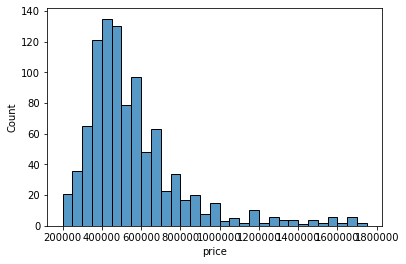

In [254]:
plt.ticklabel_format(style='plain', axis='x')
sb.histplot(data=df_clean, x='price');

#### Price/sqft

In [255]:
df_clean['price/sqft'] = df_clean['price']/df_clean['sqft']

C:\Users\dung_\anaconda3\envs\webml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now, let's look at the price/sqft distribution

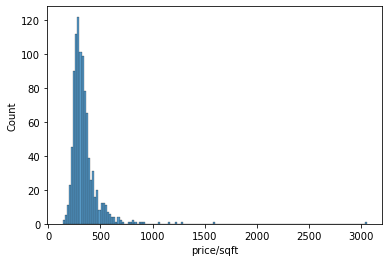

In [257]:
sb.histplot(data=df_clean, x='price/sqft');

I've noticed some outliers here too. Let's see the quartile 

In [268]:
percentile_98 = df_clean['price/sqft'].quantile(0.98)
percentile_99 = df_clean['price/sqft'].quantile(0.99)
percentile_995 = df_clean['price/sqft'].quantile(0.995)
percentile_998 = df_clean['price/sqft'].quantile(0.998)
print(percentile_98, percentile_99, percentile_995, percentile_998)

666.9965684656037 814.9083596024316 1071.9404524284741 1297.776659528891


In [270]:
quartile_range = [i/1000 for i in range(950,1000)]

In [ ]:
sb.lineplot